<a href="https://colab.research.google.com/github/mbhuiyan1/Advanced-Machine-Learning/blob/main/DBSCAN_clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DBSCAN Clustering on Protien data 



In [65]:
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
#Reading Input Data
df = pd.read_csv('/content/drive/MyDrive/DS-Projects-practices-22/Clustering/protein.csv')

In [68]:
# Choose Redmeat and white meat 
df1 = df.iloc[:, [1, 2]]
df1.head()

,RedMeat,WhiteMeat
0,10.1,1.4
1,8.9,14.0
2,13.5,9.3
3,7.8,6.0
4,9.7,11.4


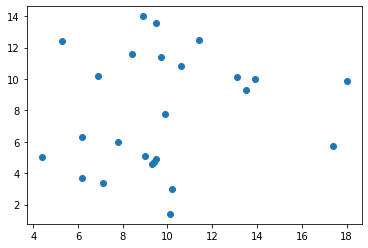

In [69]:
plt.scatter(df1[' RedMeat'],df1[' WhiteMeat'])

In [70]:
clustering = DBSCAN(eps=3, min_samples=5).fit_predict(df1)

In [71]:
clustering

array([ 1,  0,  0,  1,  0,  0,  0,  1, -1,  1, -1,  0,  1,  0,  1,  0,  1,
        1,  1,  1,  0, -1,  1,  0,  1])

negative sign is a label for noise points.

In [72]:
df1['Cluster'] = pd.DataFrame(clustering, columns=['cluster'] ) #Adding cluster columns to data df1
df1.head(n=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,RedMeat,WhiteMeat,Cluster
0,10.1,1.4,1
1,8.9,14.0,0
2,13.5,9.3,0
3,7.8,6.0,1
4,9.7,11.4,0
5,10.6,10.8,0
6,8.4,11.6,0
7,9.5,4.9,1
8,18.0,9.9,-1
9,10.2,3.0,1


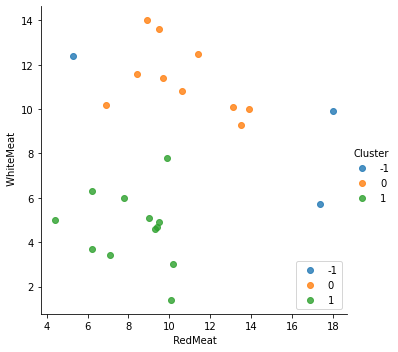

In [73]:
import seaborn as sns
# 'hue' argument to provide a factor variable
sns.lmplot( x=" RedMeat", y=" WhiteMeat", data=df1, fit_reg=False, hue='Cluster', legend=True)
plt.legend(loc='lower right')
plt.show()

In the above graph, blue points are noise points. So, DBSCAN is not sensitive to outliers.

In [74]:
# Check the accuracy of clusetring
from sklearn.metrics import silhouette_score

In [75]:
df2 = df.iloc[:, [1, 2]]
silhouette_score(df2, clustering)


0.43328663946834334